In [96]:
from google.colab import drive

In [97]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
import pandas as pd


In [99]:
piramal=pd.read_csv('/content/drive/My Drive/piramal/Train.csv')
piramal1=pd.read_csv('/content/drive/My Drive/piramal/Test.csv')
piramal.shape
piramal1.shape


(2676, 15)

In [100]:
piramal.head(2)


,L_Id,Date of Creation,Agent Category Assigned,Type of Request,Description of the Request,Location,Street Type,Region Type,Ward No,Estimated Date of Completion,Request Solution Category,Actual Date of Completion,Team Assigned,A_1,A_2,Problem Category
0,LM_1,18-12-2018 00:29,1,10,2,13,11223.0,0,7,18-12-2018 09:29,4,18-12-2018 05:34,45,1,1,1
1,LM_2,30-11-2018 22:19,1,15,17,13,10019.0,0,30,01-12-2018 07:19,8,01-12-2018 00:35,22,2,2,1


In [101]:
piramal.tail(2)

,L_Id,Date of Creation,Agent Category Assigned,Type of Request,Description of the Request,Location,Street Type,Region Type,Ward No,Estimated Date of Completion,Request Solution Category,Actual Date of Completion,Team Assigned,A_1,A_2,Problem Category
6437,LM_6438,25-07-2018 02:17,1,14,22,13,NaN,4,31,25-07-2018 11:17,12,NaN,0,5,5,0
6438,LM_6439,12-12-2018 12:00,1,10,10,13,10011.0,0,30,12-12-2018 21:00,6,12-12-2018 15:22,8,2,2,1


In [102]:
piramal.isnull().sum()

L_Id                              0
Date of Creation                  0
Agent Category Assigned           0
Type of Request                   0
Description of the Request        0
Location                          0
Street Type                     419
Region Type                       0
Ward No                           0
Estimated Date of Completion      0
Request Solution Category         0
Actual Date of Completion       432
Team Assigned                     0
A_1                               0
A_2                               0
Problem Category                  0
dtype: int64

In [103]:
piramal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6439 entries, 0 to 6438
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   L_Id                          6439 non-null   object 
 1   Date of Creation              6439 non-null   object 
 2   Agent Category Assigned       6439 non-null   int64  
 3   Type of Request               6439 non-null   int64  
 4   Description of the Request    6439 non-null   int64  
 5   Location                      6439 non-null   int64  
 6   Street Type                   6020 non-null   float64
 7   Region Type                   6439 non-null   int64  
 8   Ward No                       6439 non-null   int64  
 9   Estimated Date of Completion  6439 non-null   object 
 10  Request Solution Category     6439 non-null   int64  
 11  Actual Date of Completion     6007 non-null   object 
 12  Team Assigned                 6439 non-null   int64  
 13  A_1

In [104]:
piramal.describe()

,Agent Category Assigned,Type of Request,Description of the Request,Location,Street Type,Region Type,Ward No,Request Solution Category,Team Assigned,A_1,A_2,Problem Category
count,6439.0,6439.000000,6439.000000,6439.000000,6020.000000,6439.000000,6439.000000,6439.000000,6439.000000,6439.000000,6439.000000,6439.000000
mean,1.0,7.807579,22.504892,12.054822,10885.853654,0.555676,19.020966,6.686442,28.230005,1.992856,1.992856,1.025470
std,0.0,5.033016,11.012981,3.069295,539.927217,1.160858,13.646950,2.842832,18.073382,1.338121,1.338121,0.259586
min,1.0,0.000000,0.000000,0.000000,10001.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,2.000000,15.000000,13.000000,10452.000000,0.000000,7.000000,4.000000,13.000000,1.000000,1.000000,1.000000
50%,1.0,10.000000,25.000000,13.000000,11210.000000,0.000000,13.000000,7.000000,28.000000,2.000000,2.000000,1.000000
75%,1.0,11.000000,30.000000,13.000000,11238.000000,0.000000,30.000000,8.000000,44.000000,3.000000,3.000000,1.000000
max,1.0,20.000000,41.000000,16.000000,11694.000000,5.000000,49.000000,15.000000,66.000000,5.000000,5.000000,2.000000


In [105]:
Piramal=piramal.dropna()
Piramal.isnull().sum()
piramal1=piramal1.dropna()
piramal1.isnull().sum()

L_Id                            0
Date of Creation                0
Agent Category Assigned         0
Type of Request                 0
Description of the Request      0
Location                        0
Street Type                     0
Region Type                     0
Ward No                         0
Estimated Date of Completion    0
Request Solution Category       0
Actual Date of Completion       0
Team Assigned                   0
A_1                             0
A_2                             0
dtype: int64

In [106]:
  Piramal=Piramal.drop(columns=['L_Id','Date of Creation','Estimated Date of Completion','Actual Date of Completion'])


NameError: ignored

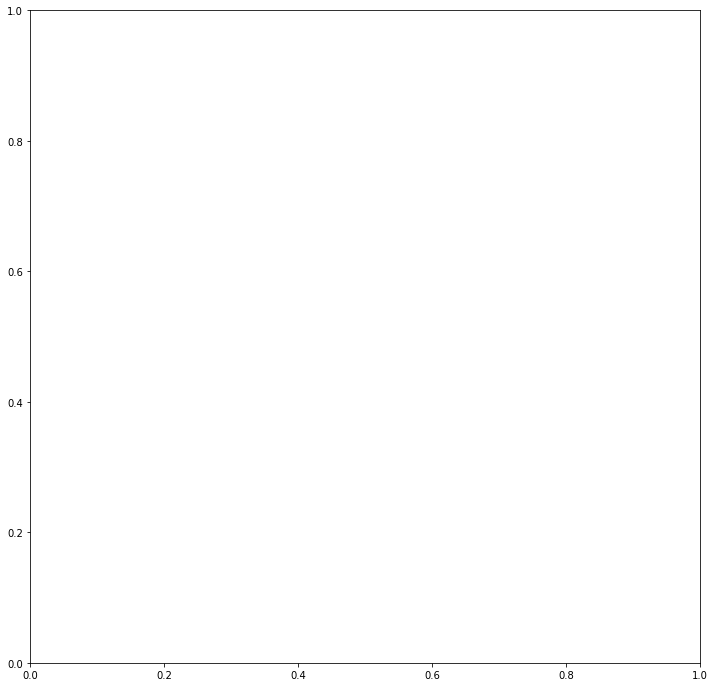

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt


corr1 = Piramal.corr()
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [ ]:
X = Piramal.drop('Problem Category', axis=1)
X.head(1)


In [ ]:
print(X.columns)

In [ ]:
corr1 = X.corr()
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
X.drop([ 'Date of Creation', 'Agent Category Assigned',
       'Type of Request', 'Description of the Request', 'Location',
       'Street Type', 'Region Type', 'Ward No', 'Estimated Date of Completion',
       'Request Solution Category', 'Actual Date of Completion','L_Id',
       'Team Assigned'], axis=1, inplace=True)
print(X.columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


mms = MinMaxScaler()
mms.fit(X)
data_transformed = mms.transform(X)

# For each k value, we will initialise k-means and use the inertia attribute to identify the
# sum of squared distances of samples to the nearest cluster centre
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
import random

X = Piramal.iloc[:, :-1].values
y = Piramal.iloc[:, -1].values


random.seed(100)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 80)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, min_weight_fraction_leaf=0.0015)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

TrainAcc = (cm_train[0][0] + cm_train[1][1])/len(y_train)
TestAcc = (cm_test[0][0] + cm_test[1][1])/len(y_test)
sensitivity = cm_test[0,0]/(cm_test[0,0]+cm_test[0,1])
specificity = cm_test[1,1]/(cm_test[1,0]+cm_test[1,1])

print('########################  Random Forest  ######################')
print('Accuracy For Training Set = ', TrainAcc.round(decimals=6))
print('Accuracy For Testing  Set = ', TestAcc.round(decimals=6))
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)
print('\n')


In [108]:
  piramal1=piramal1.drop(columns=['L_Id','Date of Creation','Estimated Date of Completion','Actual Date of Completion'])

In [109]:
piramal1.head(2)

,Agent Category Assigned,Type of Request,Description of the Request,Location,Street Type,Region Type,Ward No,Request Solution Category,Team Assigned,A_1,A_2
0,1,2,31,13,11213.0,0,7,8,33,1,1
2,1,14,22,13,10027.0,2,30,7,38,2,2


In [110]:
piramal1.shape

(2495, 11)

In [111]:
y_pred = classifier.predict(piramal1)


In [112]:
print(y_pred)

[1 1 1 ... 1 1 1]
